# Introduction:
The dataset used in this project is one of the historical sales of supermarket company which has been recorded in 3 different branches for 3 months data. The project aims to analyze supermarket sales across different branches and provide insight to understand the customer better.

# Variables
* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups — Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product.
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available — Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


# Importing the Libraries and Dataset

In [50]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
plt.style.use("seaborn")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Loading supermarket sales csv file to supermarket dataframe
supermarket = pd.read_csv('supermarket_sales (1).csv')

# Prilimanary Inspection

In [52]:
supermarket.shape
print(f'The dataset has {supermarket.shape[0]} observations and {supermarket.shape[1]} variables')

The dataset has 1000 observations and 17 variables


In [53]:
supermarket.head() #checking first five rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [54]:
supermarket.tail() #checking last five rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# Basic Exploratory Steps

In [55]:
# Checking Null Values (if there are missing values or not)
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no missing values in the dataset

In [56]:
# Checking datatypes of variables
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [57]:
# Checking Duplicate values
supermarket.duplicated().sum()

0

In [58]:
# Checking number of uniques values in each columns
supermarket.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

There is no Duplicated Values

## Changing data-types of Variables

In [60]:
# Converting ‘date’, ‘day’, ‘month’, ‘year’, ‘Time’ & ‘hour’ to a specified format so that it is easier to understand and process.
supermarket['Date']=pd.to_datetime(supermarket['Date'])
supermarket['day'] = (supermarket['Date']).dt.day
supermarket['month'] = (supermarket['Date']).dt.month
supermarket['year'] = (supermarket['Date']).dt.year
supermarket["Time"]=pd.to_datetime(supermarket['Time'])
supermarket['Hour'] = (supermarket['Time']).dt.hour

In [61]:
supermarket['Hour'].nunique()

11

In [62]:
supermarket['month'].nunique()

3

In [63]:
supermarket['month'].unique()

array([1, 3, 2])

In [64]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [69]:
# Statistical summary for Numerical data
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [70]:
# Statistical summary for Categorical data
supermarket.describe(include=['object','category'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,745-74-0715,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


In [71]:
supermarket.describe(include=['datetime'])

,Date,Time
count,1000,1000
unique,89,506
top,2019-02-07 00:00:00,2022-02-23 14:42:00
freq,20,7
first,2019-01-01 00:00:00,2022-02-23 10:00:00
last,2019-03-30 00:00:00,2022-02-23 20:59:00


In [72]:
supermarket.drop(["Invoice ID"],axis=1,inplace=True)

## Checking unique values in categorical columns

In [80]:
supermarket['Branch'].nunique()

3

In [81]:
supermarket['City'].nunique()

3

In [108]:
supermarket['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [82]:
supermarket['Customer type'].nunique()

2

In [83]:
supermarket['Gender'].nunique()

2

In [84]:
supermarket['Product line'].nunique()

6

In [85]:
supermarket['Payment'].nunique()

3

# Univariate Analysis
## 1. Is your supermarket more popular with males or females? 


### Based on Customer counts

In [110]:
supermarket.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


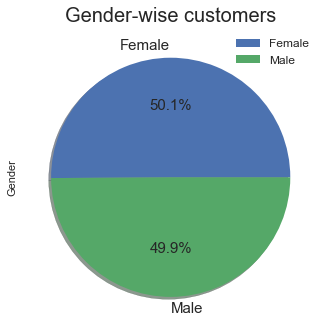

In [179]:
supermarket["Gender"].value_counts().plot(kind="pie",fontsize=15,autopct="%1.1f%%",shadow=True)
plt.legend(fontsize=12)
plt.title('Gender-wise customers', fontsize=20)
plt.show()


Our Supermarket seems to have same popularity between males and females based on customer counts

Text(0.5, 1.0, 'Gender-wise customers')

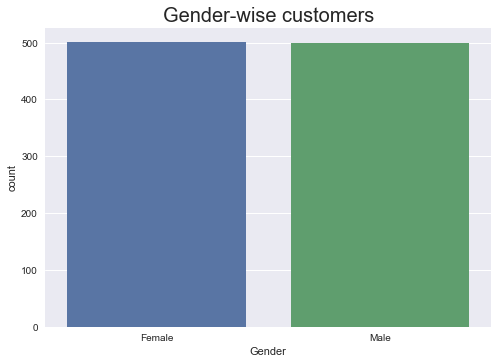

In [180]:
sns.countplot(x="Gender", data=supermarket,);
plt.title('Gender-wise customers', fontsize=20)

## 2. What does the customer rating look like and can you also comment on its skewness?

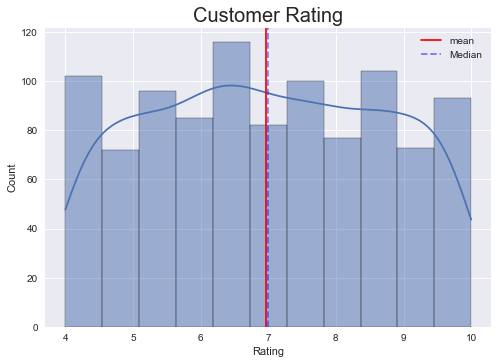

In [181]:
sns.histplot(supermarket['Rating'],kde=True)
plt.axvline(x=np.mean(supermarket['Rating']), c='red', label='mean')
plt.axvline(x=np.median(supermarket['Rating']),c='blue',alpha=0.5,ls='--',label='Median')
plt.title('Customer Rating', fontsize=20)
plt.legend()

### Customer ratings are Normally distributed and there is no skewness present in it.

In [150]:
supermarket['Rating'].skew()

0.00900964876573073

## 3. What can you say about the aggregate sales across the branches?

In [170]:
sale_branch=supermarket.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.70649999994$


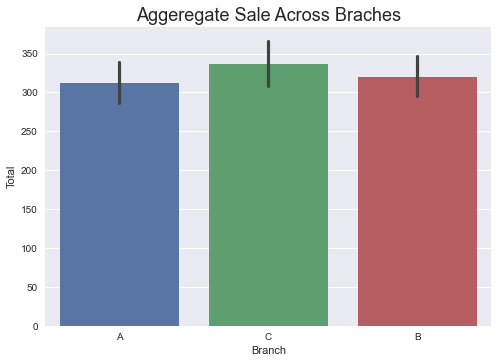

In [178]:
plt.title('Aggeregate Sale Across Braches', fontsize=18)
sns.barplot(x="Branch", y="Total", data=supermarket);

### Branch C has the highest number of sale

## Which is the most popular payment method used by customers?

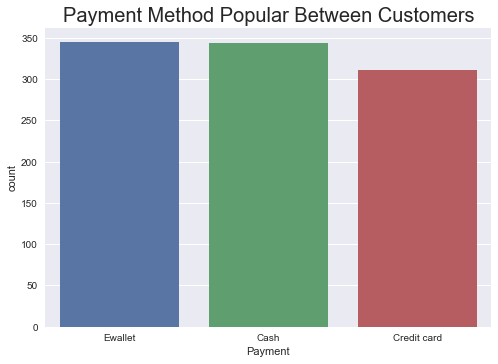

In [192]:
sns.countplot(supermarket['Payment']);
plt.title('Payment Method Popular Between Customers', fontsize=20);

The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

# Part-3: Bivariate analysis

## 1. Does gross income affect customer ratings? 

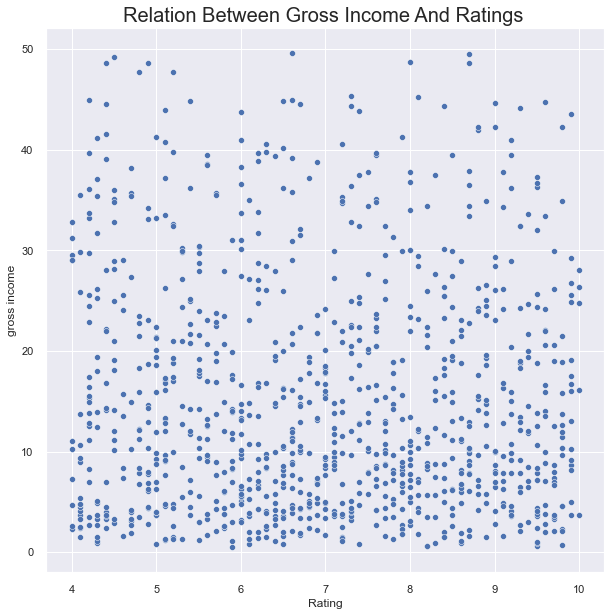

In [248]:
sns.scatterplot(data=supermarket, y="gross income", x="Rating")
sns.set(rc = {'figure.figsize':(10,10)})
plt.title('Relation Between Gross Income And Ratings ', fontsize=20)
plt.show()

### As you can see from the scatter plot there is no relationship between gross income of a customer and his rating.


## 2. Which is the most profitable branch? 

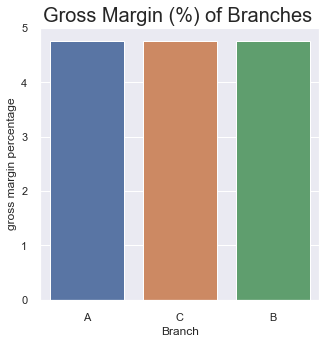

In [288]:
sns.barplot(x=supermarket['Branch'], y=supermarket['gross margin percentage'])
sns.set(rc = {'figure.figsize':(5,5)})
plt.title('Gross Margin (%) of Branches ', fontsize=20);

### All branches are having almost same gross margin percentage and hence all are equally profitable

## 3. How is the relationship between Gender and Gross income? 

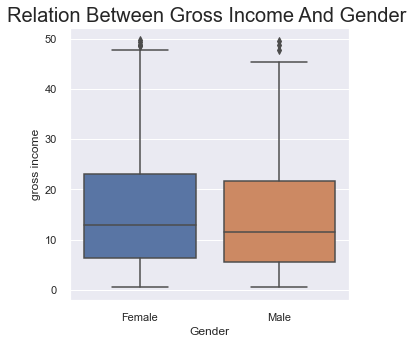

In [253]:
sns.boxplot(data=supermarket, y="gross income", x="Gender")
plt.title('Relation Between Gross Income And Gender ', fontsize=20)
plt.show()

### Gross income is similar for both male and female, though female customers spend a bit higher at supermarket

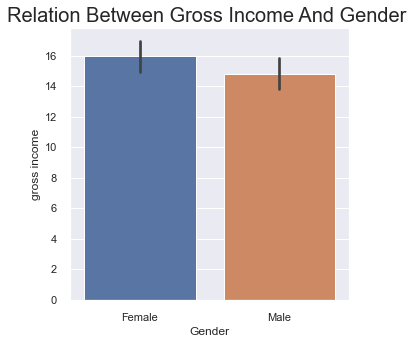

In [289]:
sns.barplot(data=supermarket, y="gross income", x="Gender")
plt.title('Relation Between Gross Income And Gender ', fontsize=20)
plt.show()

## 4. Can you see any time trend in gross income? 

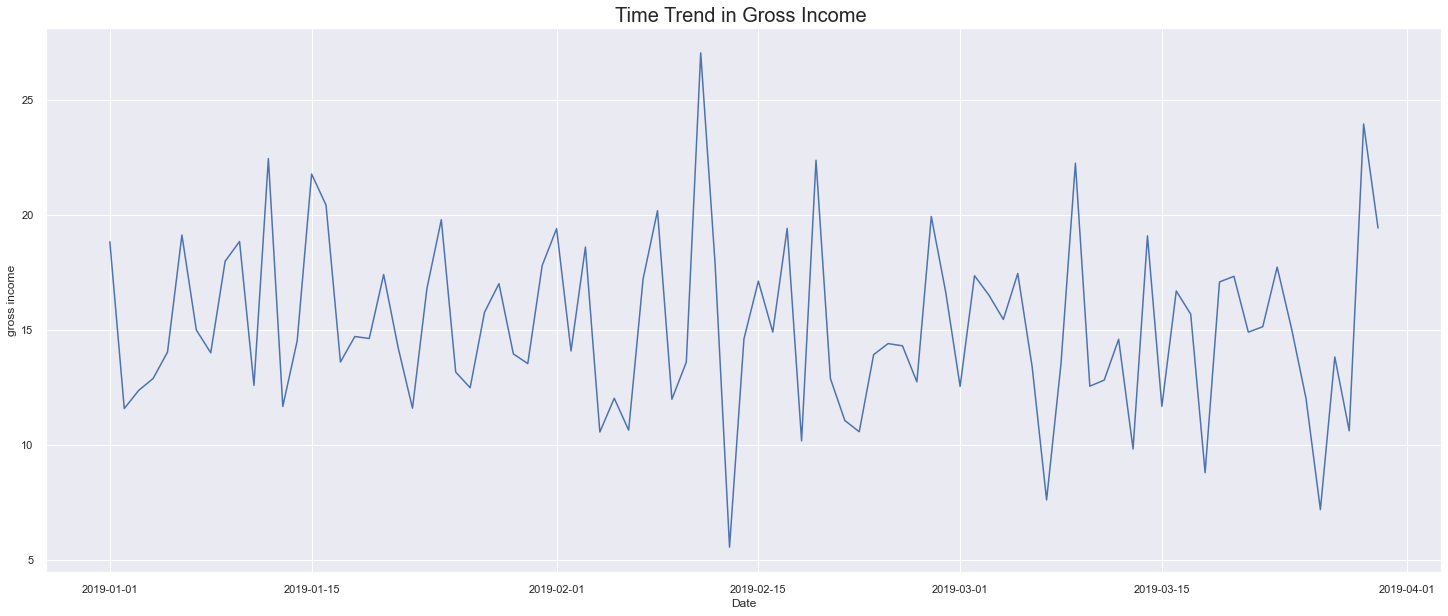

In [292]:
plt.title('Time Trend in Gross Income ', fontsize=20)
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x="Date", y="gross income",data=supermarket,ci=None,sort=True,);

### Except for a few days when the gross income is unusually high or unusually low, there is no noticeable time trend. Overall, it remains at a certain level of average.

## 5. Which product line helps you generate the most income? 

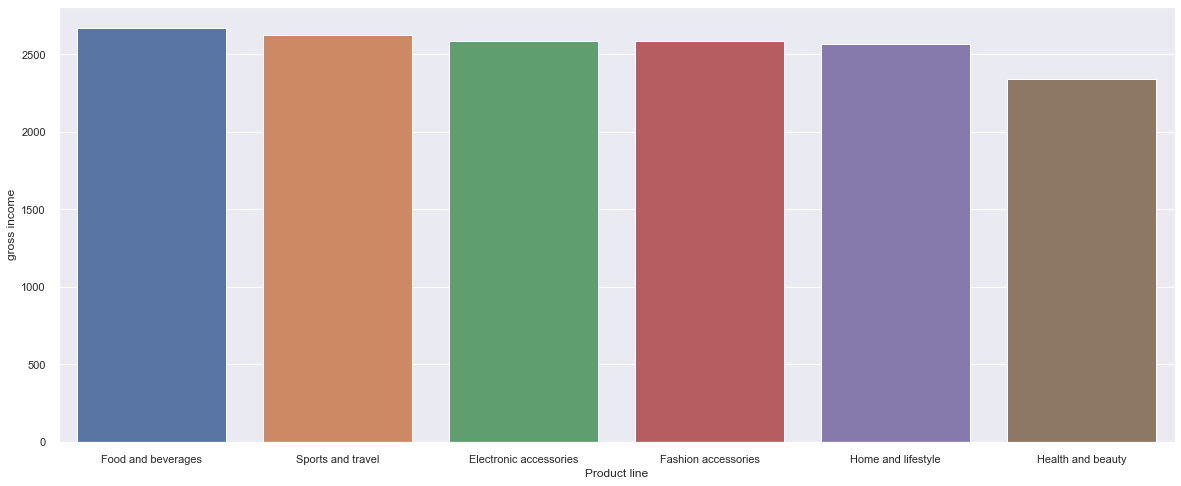

In [321]:
cat=supermarket[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat);

## 6. What is the spending pattern of both males and females, meaning in which category do they spend more? 

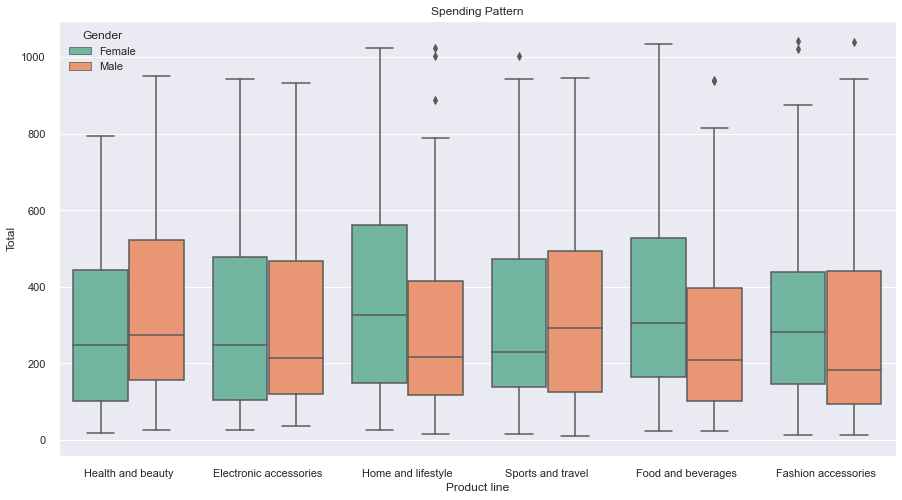

In [344]:
plt.figure(figsize=(15, 8))
plt.title('Spending Pattern')
sns.boxplot(x = supermarket['Product line'], y = supermarket['Total'], hue = supermarket.Gender, palette="Set2");

### Females spend the most on 'Home and lifestyle' & 'fashion accessories,' while males spend the most on 'Sports and travel.' 

## How many products are bought by customers? 

Text(0, 0.5, 'Product Line')

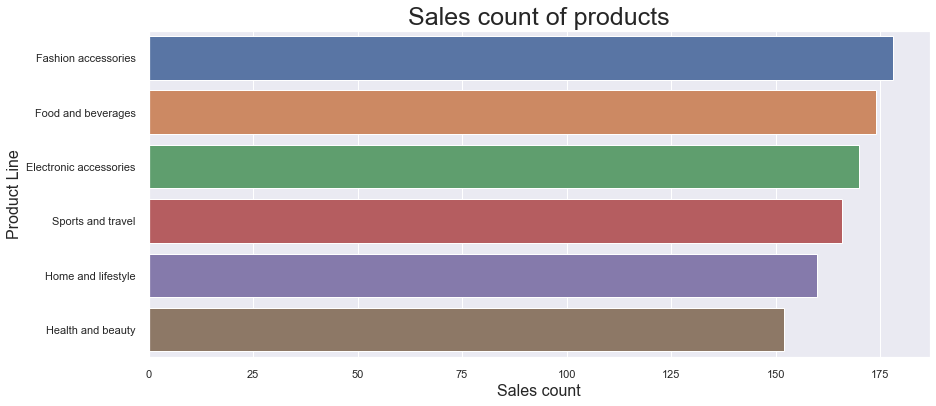

In [348]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=supermarket, order = supermarket['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

## Which day of the week has maximum sales?  

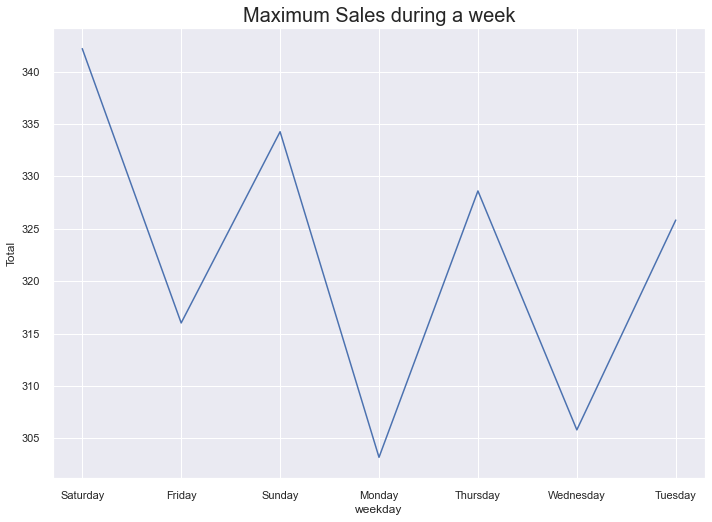

In [377]:
supermarket['weekday'] = supermarket['Date'].dt.day_name()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Maximum Sales during a week', fontsize=20)
sns.lineplot(x='weekday', y="Total",data=supermarket,ci=None,sort=True);

### Saturdays and Sudays have maximum number of sales

## 9. Which hour of the day is busiest?

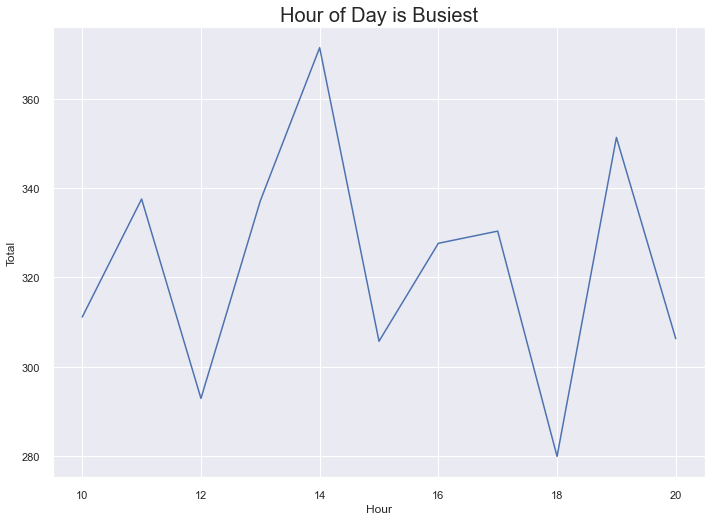

In [375]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Hour of Day is Busiest', fontsize=20)
sns.lineplot(x='Hour', y="Total",data=supermarket,ci=None);

### Busiest Hour of the day in super market is 14:00 Hrs (2:00 PM)

## 10. Which product line should your supermarket focus on?

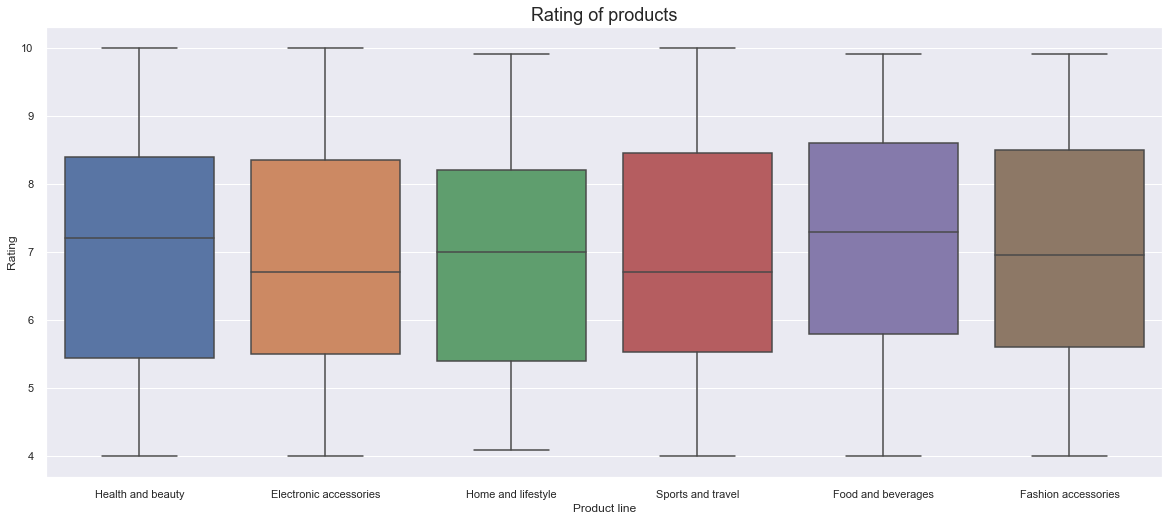

In [385]:
plt.title('Rating of products', fontsize=18)
sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x="Product line", y="Rating", data=supermarket);

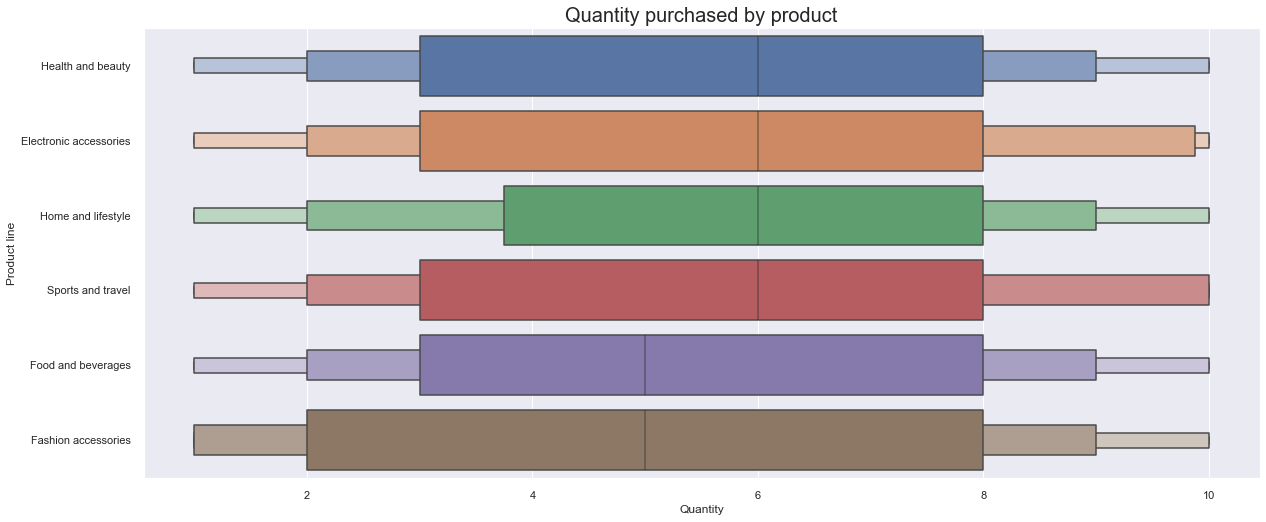

In [384]:
plt.title('Quantity purchased by product', fontsize=20)
sns.boxenplot(y = 'Product line', x = 'Quantity', data=supermarket );

### Ratings are similar for all the product lines but quantity purchased are lower for 'Food and beverages' and 'Fashion accessories'. so supermarket should focus on these product lines

## 11. Which city should be chosen for expansion and what products should be focussed on?

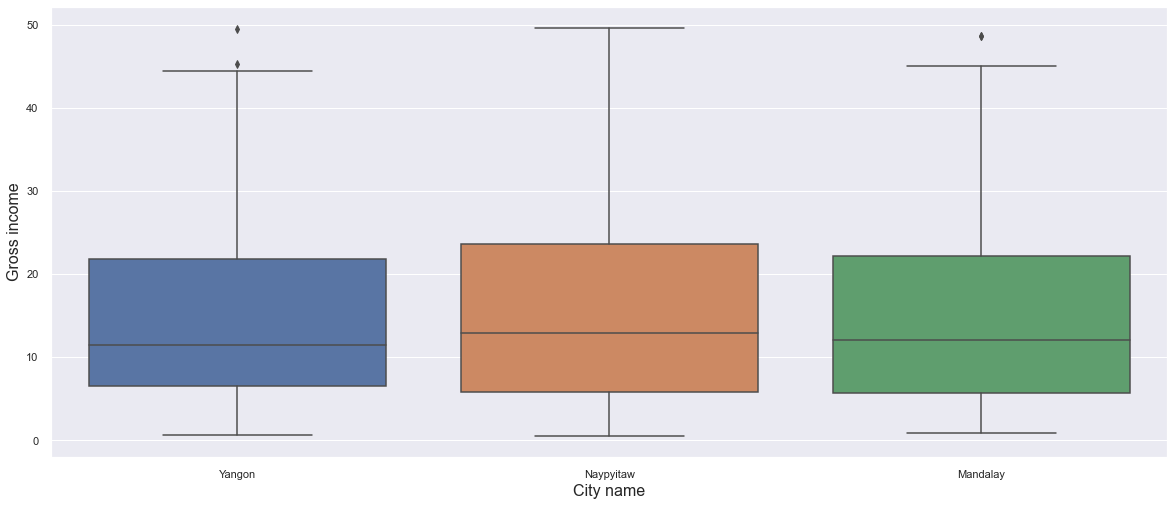

In [394]:
sns.boxplot(supermarket['City'],supermarket['gross income'])
plt.xlabel('City name',fontsize='16')
plt.ylabel('Gross income',fontsize='16');

### It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.


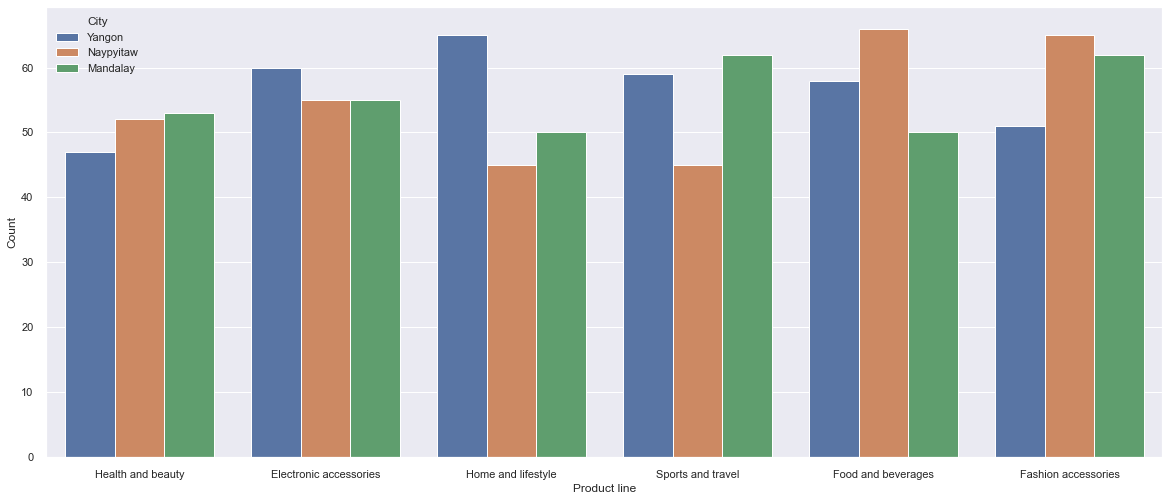

In [393]:
sns.countplot(x ='Product line', hue = "City", data = supermarket) 
plt.ylabel('Count');

### Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.